In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC, NuSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import StratifiedKFold
from cfg import *
from loader import *


In [24]:
dtype = ['T1', 'T1c', 'T2', 'Flair']
# dtype = ['Flair']
X, y = img_features(dtype)


In [48]:
clf = NuSVC(max_iter=1, nu=.35, kernel='rbf', degree=4, 
            # probability=True,
            class_weight='balanced', warm_start=True
)
clf = Pipeline([
    # ('scaler', preprocessing.Normalizer()),
    ('selector', SelectPercentile(chi2, percentile=80)), 
    ('svm', clf)
])
skf = StratifiedKFold(n_splits=K_FOLD, shuffle=True, random_state=SEEDS[0])
for train_idx, val_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]
    break

TypeError: __init__() got an unexpected keyword argument 'warm_start'

In [45]:
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 100
N_BATCH = 4
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    # print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    # while True:
    #     # MINI-BATCH
    clf.fit(X_train, y_train)
    scores_train.append(clf.score(X_train, y_train))
    scores_test.append(clf.score(X_test, y_test))
    epoch += 1



/home/rockyo/anaconda3/envs/brain-pr/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/rockyo/anaconda3/envs/brain-pr/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/rockyo/anaconda3/envs/brain-pr/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/rockyo/anaconda3/envs/brain-pr/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/rockyo/anaconda3/envs/

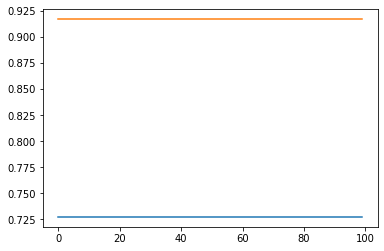

AttributeError: 'Pipeline' object has no attribute 'validation_scores_'

In [47]:
# fig, ax = plt.subplots(2, sharex=True, sharey=True)
plt.plot(scores_train)
# ax[0].set_title('Train')
plt.plot(scores_test)
# ax[1].set_title('Test')
# fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()


In [4]:
import glob
import cv2
from skimage.feature import texture
from cfg import *
import numpy as np

def glcm_features(f):
        img = cv2.imread(f, 0)
        g = texture.greycomatrix(img, [1, 2, 3, 4, 5, 6, 7], [0, np.pi/2], levels=256, normed=True, symmetric=True)
        features = []
        for p in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']:
            f = texture.greycoprops(g, p)
            print('grayco matrix:', g.shape, 'grey coprops', f.shape)
            features.append(f)
        return np.array(features).flatten() 


PR = glob.glob(f'{segmented_img_dir}/PR/T1c/*.jpg')
non_PR = glob.glob(f'{segmented_img_dir}/non_PR/T1c/*.jpg')
y = [1]*len(PR) + [0]*len(non_PR)
ALL_PR = PR + non_PR
for f in ALL_PR:
    textual_feature = glcm_features(f)
    print(textual_feature.shape)
    break
    

grayco matrix: (256, 256, 7, 2) grey coprops (7, 2)
grayco matrix: (256, 256, 7, 2) grey coprops (7, 2)
grayco matrix: (256, 256, 7, 2) grey coprops (7, 2)
grayco matrix: (256, 256, 7, 2) grey coprops (7, 2)
grayco matrix: (256, 256, 7, 2) grey coprops (7, 2)
grayco matrix: (256, 256, 7, 2) grey coprops (7, 2)
(84,)


In [7]:
dtype = ['T1', 'T1c', 'T2', 'Flair']
    # dtype = ['Flair']
X, y = img_features(dtype)
    

In [8]:
X[0].shape

(112,)

In [13]:
sel = SelectPercentile(chi2, percentile=65)
X_transformed = sel.fit_transform(X, y)

In [14]:
X_transformed.shape

(56, 73)